In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/intro-to-data-cleaning-eda-and-machine-learning.html
/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/bi.csv


In [2]:
dirname,filenames

('/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning',
 ['intro-to-data-cleaning-eda-and-machine-learning.html', 'bi.csv'])

In [3]:
df = pd.read_csv('/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/bi.csv',encoding = 'latin1')

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [5]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


## Checking the missing Values

In [7]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [8]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [9]:
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

## Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Figure size 2000x1200 with 0 Axes>

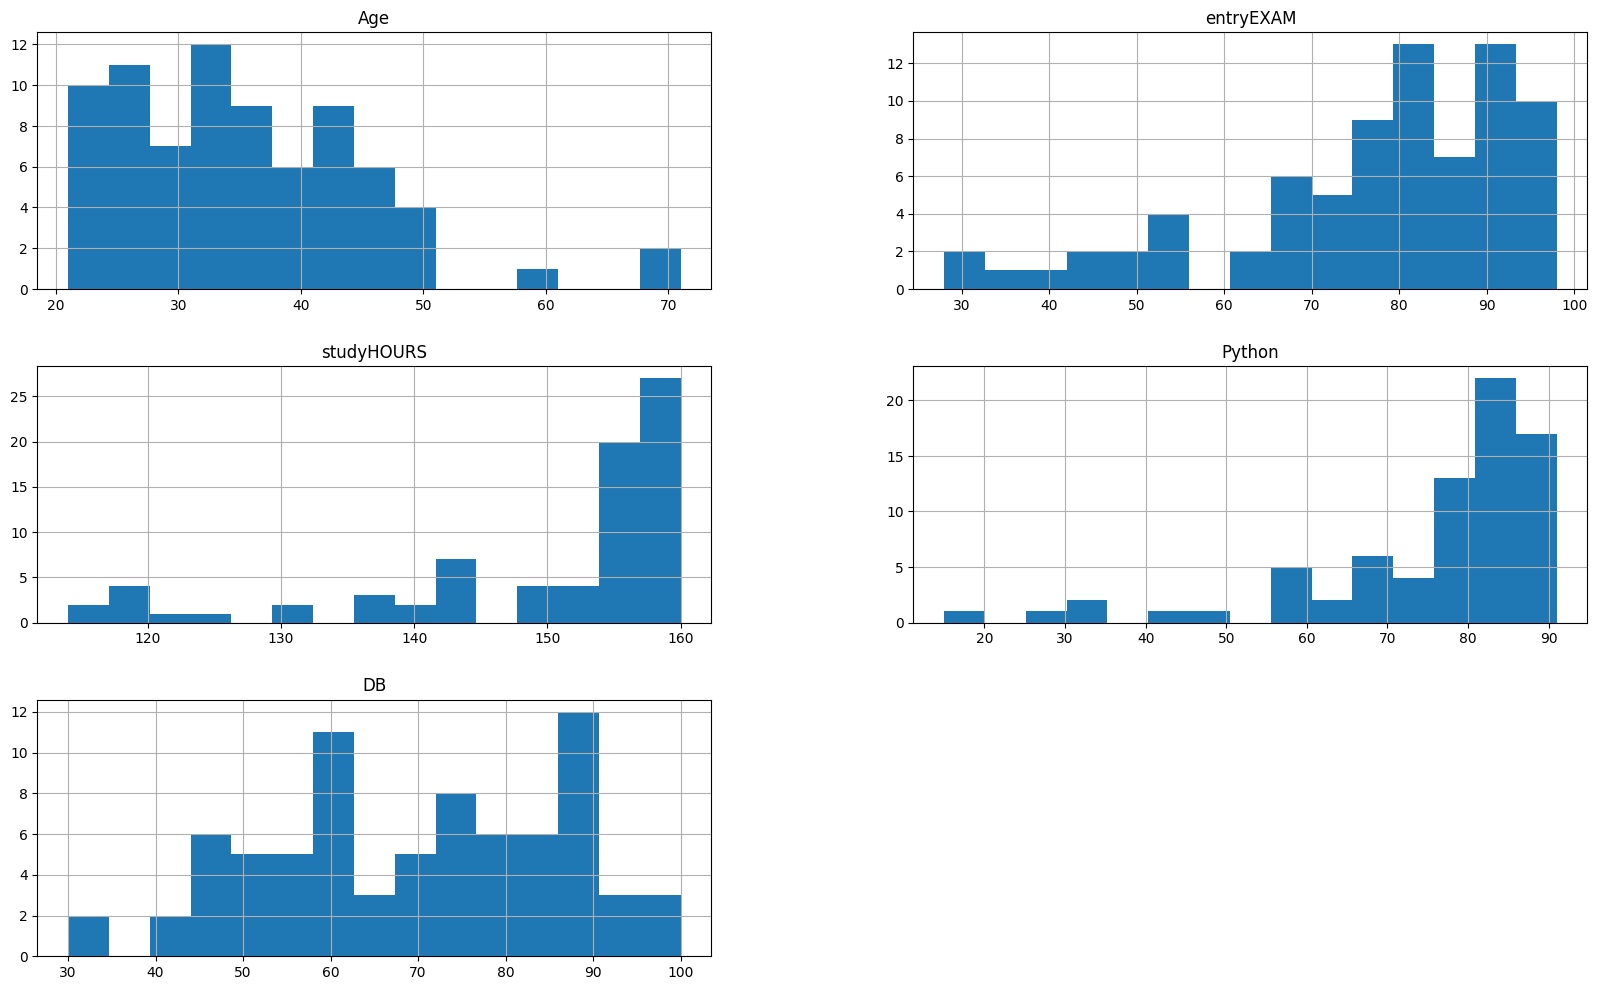

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize = (20,12))
df.hist(bins = 15,figsize = (20,12),)
plt.show()
plt.tight_layout()


None of the features follow normal distribution

## Visualization on categorical Features

In [12]:
categorical_features = df.select_dtypes(include = ['object']).columns.tolist()
categorical_features

['fNAME', 'lNAME', 'gender', 'country', 'residence', 'prevEducation']

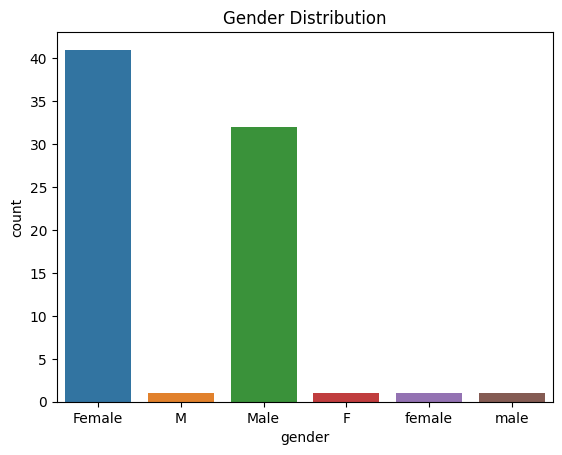

In [13]:
# on gender column
sns.countplot(x = df.gender, data = df)
plt.title('Gender Distribution')
plt.show()

In [14]:
df.gender.value_counts()

gender
Female    41
Male      32
M          1
F          1
female     1
male       1
Name: count, dtype: int64

In [15]:
df['gender'] = df['gender'].str.strip().str.lower()

df['gender'] = df['gender'].replace({
    'm': 'male',
    'male': 'male',
    'female': 'female',
    'f': 'female'
})

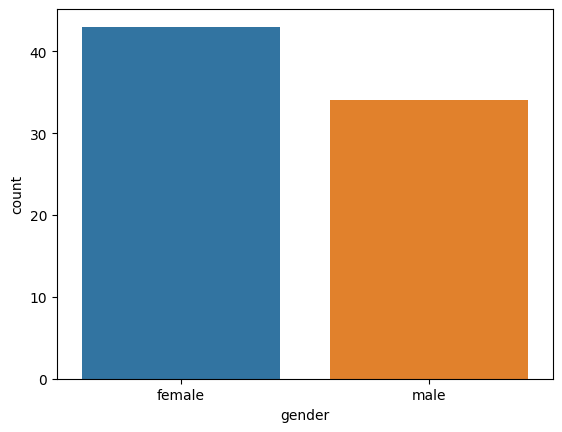

In [16]:
sns.countplot(x =df.gender, data= df)
plt.show()

In [17]:
# on country
df.country.value_counts()

country
Norway          47
Uganda           4
Kenya            3
Germany          3
Denmark          2
Netherlands      2
Italy            2
Spain            2
UK               2
Somali           2
Nigeria          2
France           2
Rsa              1
South Africa     1
Norge            1
norway           1
Name: count, dtype: int64

Norway outnumbered all the countries in a huge number

In [18]:
# fix the typo on country column
df.country = df.country.replace({
    'norway': 'Norway'
})

In [19]:
df.country.value_counts()

country
Norway          48
Uganda           4
Kenya            3
Germany          3
Denmark          2
Netherlands      2
Italy            2
Spain            2
UK               2
Somali           2
Nigeria          2
France           2
Rsa              1
South Africa     1
Norge            1
Name: count, dtype: int64

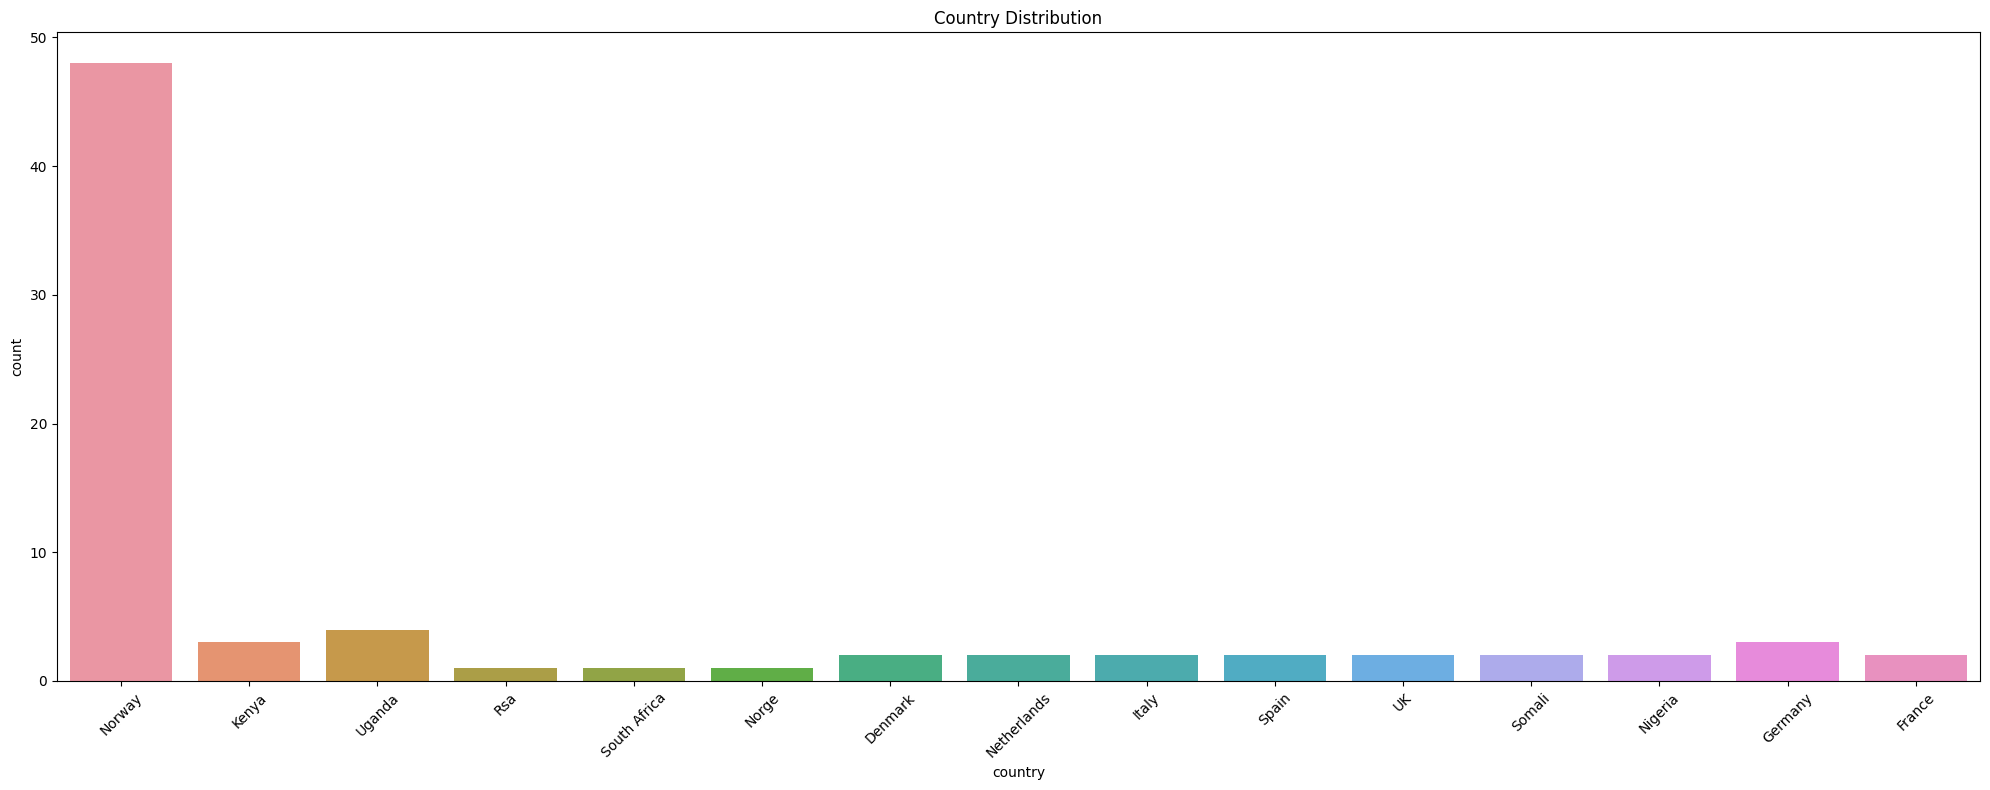

In [20]:
plt.figure(figsize = (20,8))
sns.countplot(x = df.country, data = df,)

plt.title('Country Distribution')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [21]:
# on residence column
df.residence.value_counts()

residence
Private         33
BI Residence    29
Sognsvann       12
BI-Residence     1
BIResidence      1
BI_Residence     1
Name: count, dtype: int64

In [22]:
# fix the typo on residence column
df.residence = df.residence.replace({
    'BI-Residence': 'BI_Residence',
    'BI Residence': 'BI_Residence',
    'BI_Residence': 'BI_Residence',
    'BIResidence': 'BI_Residence'
})

In [23]:
df.residence.value_counts()

residence
Private         33
BI_Residence    32
Sognsvann       12
Name: count, dtype: int64

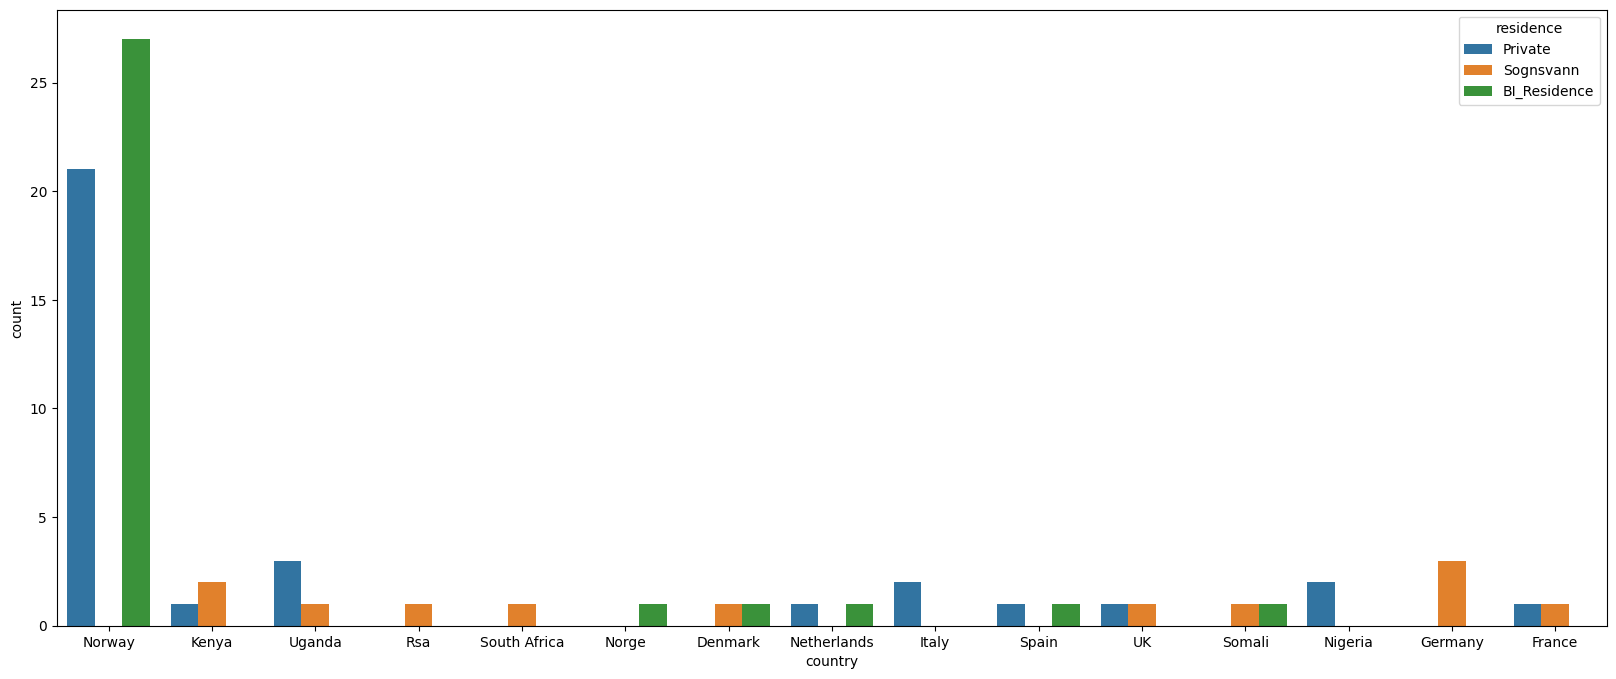

In [24]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'country', hue = 'residence', data = df)
plt.show()

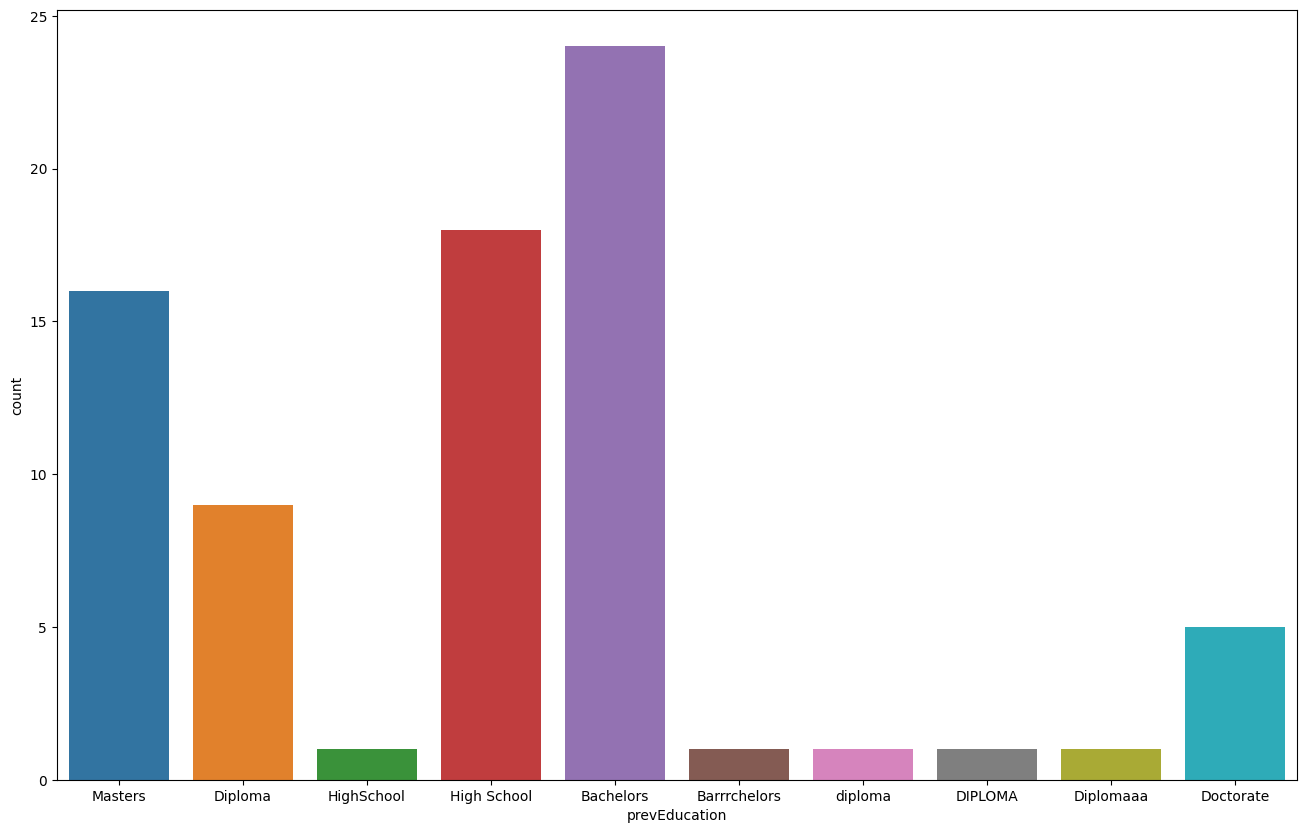

In [25]:
plt.figure(figsize = (16,10))
sns.countplot(x = df.prevEducation, data = df)
plt.show()

In [26]:
df.prevEducation.value_counts()


prevEducation
Bachelors       24
High School     18
Masters         16
Diploma          9
Doctorate        5
HighSchool       1
Barrrchelors     1
diploma          1
DIPLOMA          1
Diplomaaa        1
Name: count, dtype: int64

In [27]:
# fix the typo on prevEducation column
df.prevEducation = df.prevEducation.str.strip().str.lower()
df.prevEducation = df.prevEducation.replace({
    'barrrchelors': 'Bachelors',
    'bachelors': 'Bachelors',
    'highschool': 'HighSchool',
    'high school': 'HighSchool',
    'diploma': 'Diploma',
    'diplomaaa': 'Diploma',
    'masters': 'Masters',
    'doctorate': 'Doctorate'
})

In [28]:
df.prevEducation.value_counts()

prevEducation
Bachelors     25
HighSchool    19
Masters       16
Diploma       12
Doctorate      5
Name: count, dtype: int64

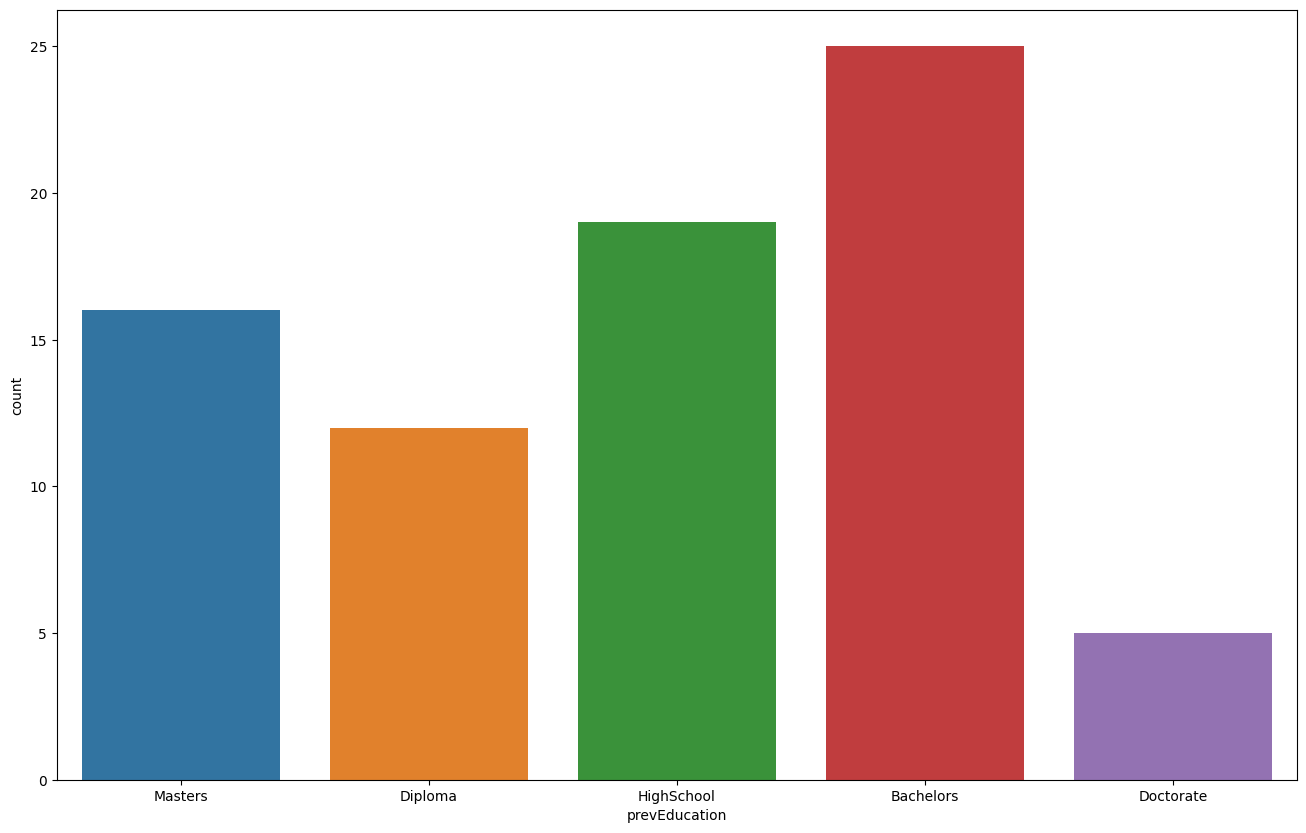

In [29]:
plt.figure(figsize = (16,10))
sns.countplot(x = df.prevEducation, data = df)
plt.show()

## Bivariate Analysis

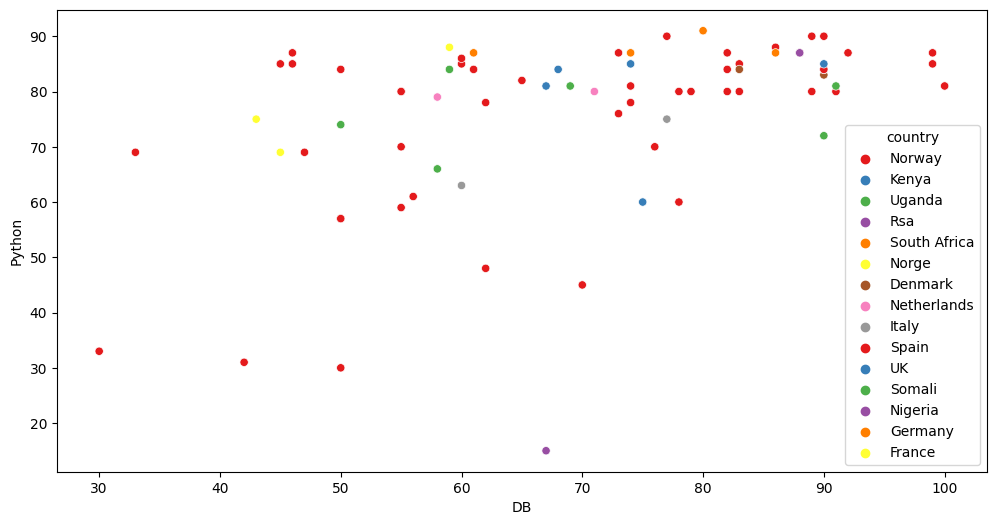

In [30]:
# show the relation between db and python along with the country
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'DB',y = 'Python' ,hue = 'country', palette = "Set1", data =df)
plt.show()

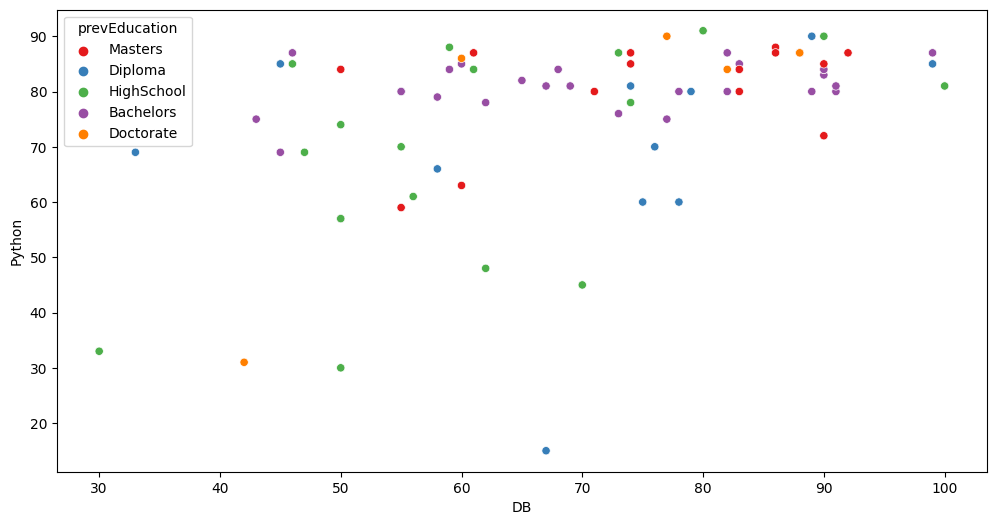

In [31]:
# show the relation between db and python along with the country
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'DB',y = 'Python' ,hue = 'prevEducation', palette = "Set1", data =df)
plt.show()

High school has the most diverse marks distribution. People who are in their bachelors, all get a good marks in python, but don't do very well with db.

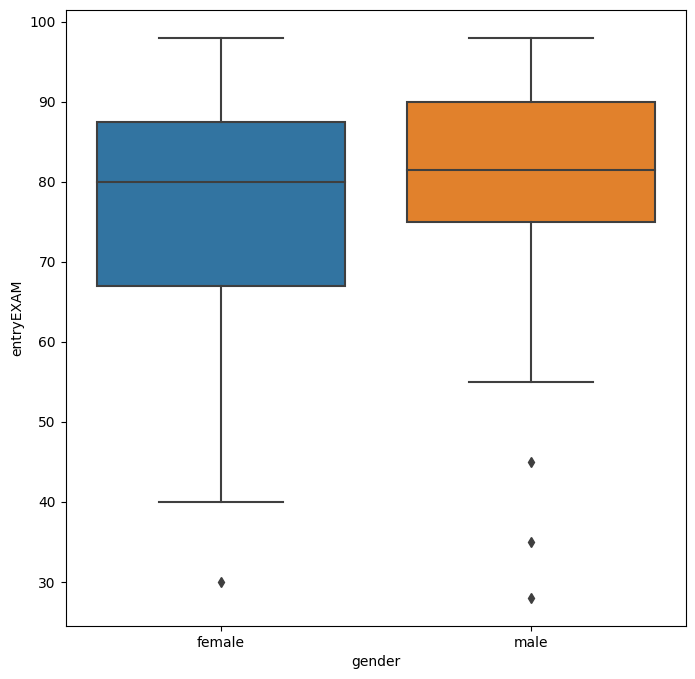

In [32]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'gender', y = 'entryEXAM', data = df, )
plt.show()

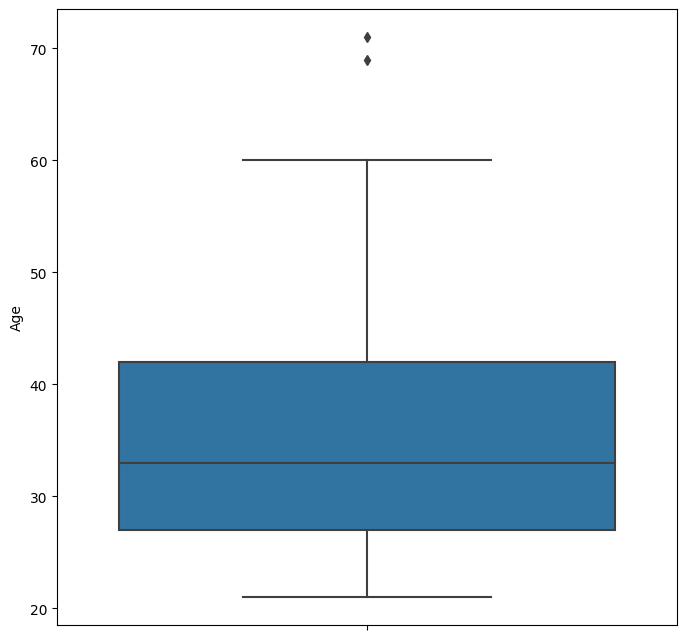

In [33]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'Age',data = df)
plt.show()

In [34]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR  = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5 * IQR

df_no_outliers = df[(df.Age >= lower_bound) & (df.Age <= upper_bound)]

In [35]:
df_no_outliers.shape

(75, 11)

In [36]:
df = df_no_outliers

## Creative model and pipeline

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [38]:
# Feature engineering
num_cols = df.select_dtypes(include = ['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()

df[num_cols] = df[num_cols].fillna(df[num_cols].median())


for cols in cat_cols:
    df[cols] = df[cols].fillna(df[cols].mode()[0])

encoder = LabelEncoder()

for cols in cat_cols:
    df[cols]= encoder.fit_transform(df[cols].astype(str))

X = df.drop(columns = ['fNAME', 'lNAME','entryEXAM'])

y = df['entryEXAM']

In [39]:
X.shape,y.shape

((75, 8), (75,))

In [40]:
## Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVM": SVR(),
    "XGBoost": XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred) * 100
    results[name] = r2
    print(f"{name:20} : {r2:.2f} %")


Linear Regression    : 44.14 %
Random Forest        : 32.97 %
Gradient Boosting    : 25.98 %
SVM                  : 15.34 %
XGBoost              : 20.79 %


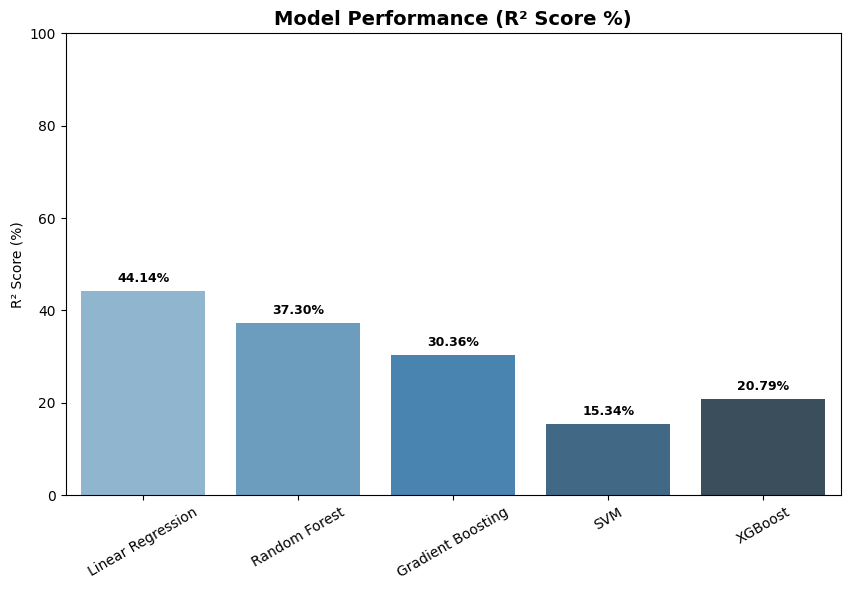

In [42]:
results = {
    "Linear Regression": 44.14,
    "Random Forest": 37.30,
    "Gradient Boosting": 30.36,
    "SVM": 15.34,
    "XGBoost": 20.79
}

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Blues_d")
plt.title("Model Performance (R² Score %)", fontsize=14, fontweight="bold")
plt.ylabel("R² Score (%)")
plt.ylim(0,100)
plt.xticks(rotation=30)

# Annotate values on top
for i, v in enumerate(results.values()):
    plt.text(i, v + 2, f"{v:.2f}%", ha="center", fontsize=9, fontweight="bold")

plt.show()
